In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount= True)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import random
import os
import numpy as np

In [ ]:
train_path = "/content/drive/MyDrive/card_train.csv"
test_path = "/content/drive/MyDrive/card_test.csv"

In [ ]:
train_df = pd.read_csv(train_path, encoding = 'utf-8-sig')
y_train = train_df['Segment']
train_df

,Unnamed: 0.1,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,청구금액_B0,...,컨택건수_CA_청구서_R6M,컨택건수_이용유도_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,ID,Segment.1
0,61865,1,자동이체,주거지,우편,우편,1,1,1,466,...,0,5,5,0,0,0,1회 이상,1일 이상,TRAIN_000389,E
1,8547,13,자동이체,미확인,이메일,이메일,1,1,1,2417,...,0,4,6,0,0,0,1회 이상,1일 이상,TRAIN_304152,D
2,43497,25,자동이체,주거지,우편,우편,0,0,0,0,...,2,4,2,0,0,0,5회 이상,5일 이상,TRAIN_356239,E
3,40785,25,자동이체,주거지,우편,우편,1,1,1,5931,...,0,0,0,0,0,0,1회 이상,1일 이상,TRAIN_122432,E
4,18999,25,자동이체,주거지,우편,우편,1,1,1,684,...,2,0,0,0,0,0,10회 이상,10일 이상,TRAIN_285200,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70555,40610,20,자동이체,회사,우편,우편,1,1,1,958,...,0,0,4,0,0,0,5회 이상,5일 이상,TRAIN_194015,E
70556,2629,27,자동이체,주거지,우편,우편,1,1,1,19187,...,0,1,0,0,0,3,1회 이상,1일 이상,TRAIN_286464,C
70557,65345,12,자동이체,주거지,우편,우편,1,1,1,4788,...,2,0,0,0,0,0,20회 이상,20일 이상,TRAIN_069189,E
70558,69023,23,자동이체,미확인,이메일,이메일,1,1,1,17,...,0,2,0,0,0,0,10회 이상,10일 이상,TRAIN_170116,E


In [ ]:
for i in train_df.columns:
    print(i)

Unnamed: 0.1
대표결제일
대표결제방법코드
대표청구지고객주소구분코드
대표청구서수령지구분코드
청구서수령방법
청구서발송여부_B0
청구서발송여부_R3M
청구서발송여부_R6M
청구금액_B0
청구금액_R3M
청구금액_R6M
포인트_마일리지_건별_B0M
포인트_마일리지_건별_R3M
포인트_포인트_건별_B0M
포인트_포인트_건별_R3M
포인트_마일리지_월적립_B0M
포인트_마일리지_월적립_R3M
포인트_포인트_월적립_B0M
포인트_포인트_월적립_R3M
포인트_적립포인트_R12M
포인트_적립포인트_R3M
포인트_이용포인트_R12M
포인트_이용포인트_R3M
포인트_잔여포인트_B0M
마일_적립포인트_R12M
마일_적립포인트_R3M
마일_이용포인트_R12M
마일_이용포인트_R3M
마일_잔여포인트_B0M
할인건수_R3M
할인금액_R3M
할인건수_B0M
할인금액_B0M
할인금액_청구서_R3M
할인금액_청구서_B0M
상환개월수_결제일_R6M
상환개월수_결제일_R3M
선결제건수_R6M
선결제건수_R3M
연체건수_R6M
연체건수_R3M
혜택수혜금액_R3M
포인트_마일리지_환산_B0M
혜택수혜금액
최초한도금액
카드이용한도금액
CA한도금액
일시상환론한도금액
월상환론한도금액
CA이자율_할인전
CL이자율_할인전
RV일시불이자율_할인전
RV현금서비스이자율_할인전
RV신청일자
RV약정청구율
RV최소결제비율
자발한도감액횟수_R12M
자발한도감액금액_R12M
자발한도감액후경과월
강제한도감액횟수_R12M
강제한도감액금액_R12M
강제한도감액후경과월
한도증액횟수_R12M
한도증액금액_R12M
한도증액후경과월
상향가능한도금액
상향가능CA한도금액
카드론동의여부
월상환론상향가능한도금액
RV전환가능여부
일시불ONLY전환가능여부
카드이용한도금액_B1M
카드이용한도금액_B2M
특별한도보유여부_R3M
연체감액여부_R3M
한도심사요청건수
한도요청거절건수
한도심사요청후경과월
한도심사거절후경과월
시장단기연체여부_R6M
rv최초시작후경과일
증감율_이용건수_신용_전월
증감율_이용건수_신판_전월
증감율_이용건수_일시불_전

In [ ]:
# recommended_columns = [
#     # 고객 기본 정보
#     "남녀구분코드", "연령", "Life_Stage", "입회경과개월수_신용", "최종카드발급경과월",
#     "회원여부_이용가능", "회원여부_연체",

#     # 카드 보유 상태 및 사용 가능 정보
#     "소지카드수_유효_신용", "소지카드수_이용가능_신용",
#     "유효카드수_신용체크", "유효카드수_체크",
#     "이용가능카드수_신용", "이용가능카드수_체크",
#     "최종이용일자_신판", "이용후경과월_신판",

#     # 이용 행태 관련
#     "이용건수_일시불_R3M", "이용건수_할부_R3M", "이용건수_CA_R3M",
#     "이용금액_일시불_R3M", "이용금액_할부_R3M", "이용금액_CA_R3M",
#     "이용금액_온라인_R3M", "이용금액_오프라인_R3M",
#     "잔액_일시불_B0M", "잔액_카드론_B0M",
#     "평잔_일시불_3M", "평잔_CA_3M", "월중평잔_일시불_B0M", "월중평잔_CA_B0M",

#     # 연체 및 상환
#     "연체건수_R3M", "연체일수_최근", "연체원금_최근",
#     "상환개월수_결제일_R3M", "선결제건수_R3M",

#     # 포인트 / 마일리지 / 혜택
#     "포인트_적립포인트_R3M", "포인트_이용포인트_R3M",
#     "포인트_잔여포인트_B0M", "마일_잔여포인트_B0M",
#     "혜택수혜금액_R3M",

#     # 마케팅 및 컨택 이력
#     "수신거부여부_TM", "수신거부여부_SMS", "마케팅동의여부",
#     "컨택건수_이용유도_TM_R6M", "컨택건수_카드론_LMS_R6M", "캠페인접촉건수_R12M",

#     # 업종별 소비 패턴
#     "쇼핑_온라인_이용금액", "교통_주유이용금액", "여유_숙박이용금액", "납부_통신비이용금액",
#     "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종", "_1순위여유업종",

#     # 이용 트렌드 및 한도 소진률
#     "증감율_이용건수_신용_전월", "증감율_이용금액_신용_전월",
#     "잔액_신판평균한도소진율_r3m", "변동률_일시불평잔"
# ]

In [ ]:
recommended_columns = [
    # 예시 처
    "남녀구분코드", "연령", "Life_Stage","회원여부_연체",
    "이용금액_할부_R12M","입회경과개월수_신용","월상환론한도금액","카드이용한도금액","증감율_이용금액_체크_전월","이용금액_일시불_R12M",
    "포인트_이용포인트_R12M","이용건수_체크_R12M","이용건수_신용_R12M","유효카드수_신용체크","이용금액_체크_R12M",
    "불만제기후경과월_R12M","RP후경과월","_1순위카드이용금액","포인트_적립포인트_R12M",
    "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종","_1순위카드이용건수","월중평잔",
     "_2순위업종_이용금액", "_2순위업종","_2순위카드이용금액","_2순위교통업종","_2순위쇼핑업종",
    "증감율_이용건수_신용_분기","CA한도금액","변동률_일시불평잔","강제한도감액금액_R12M","일시상환론한도금액",
    "변동률_할부평잔","상향가능한도금액","카드론이용건수_누적","이용건수_할부_R12M","정상청구원금_B5M","이용개월수_체크_R12M",
    "연체입금원금_B5M","정상입금원금_B5M","이용개월수_할부_R12M","최초카드론이용경과월",
    "연체일수_최근",
    "최종이용일자_기본",
    "컨택건수_이용유도_TM_R6M",
    "증감율_이용건수_체크_전월",
    "마케팅동의여부",
    "연체원금_최근",
    "이용금액_체크_B0M",
    "최종카드발급경과월",
    "수신거부여부_SMS",
    "RP건수_렌탈_B0M",
]

In [ ]:
X = train_df[recommended_columns]
X

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,연체일수_최근,최종이용일자_기본,컨택건수_이용유도_TM_R6M,증감율_이용건수_체크_전월,마케팅동의여부,연체원금_최근,이용금액_체크_B0M,최종카드발급경과월,수신거부여부_SMS,RP건수_렌탈_B0M
0,2,60대,노년생활,0,0,39,180503,100009,0.000000,8166,...,-999999,20180714,1,0.000000,0,0,0,6,1,0
1,1,30대,가족구축기,0,0,39,0,41180,0.000000,41278,...,-999999,20181130,0,0.000000,1,0,0,49,1,0
2,2,50대,자녀성장(2),0,0,172,206098,40798,0.000000,2979,...,-999999,20180110,5,0.000000,1,0,0,26,1,0
3,2,60대,노년생활,0,24373,202,206308,29999,0.000000,37780,...,-999999,20180911,1,0.000000,1,0,0,22,0,0
4,2,30대,자녀성장(1),0,15966,3,93789,18989,0.002695,2248,...,-999999,20180921,2,-0.210627,1,0,3180,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70555,1,40대,자녀성장(1),0,3982,11,151553,30003,0.000000,22659,...,-999999,20171127,0,0.000000,1,0,0,17,0,0
70556,1,50대,자녀성장(2),0,0,278,0,52017,0.000000,25655,...,-999999,20180723,0,0.000000,0,0,0,52,1,0
70557,2,60대,자녀독립기,0,28782,191,205060,41444,0.000000,27394,...,-999999,20180721,0,0.000000,1,0,0,13,0,0
70558,2,50대,자녀독립기,0,0,105,160705,50371,0.000000,952,...,-999999,20180709,0,0.000000,1,0,0,13,0,0


In [ ]:
null_columns = [col for col in X.columns if X[col].isna().sum() > 0]
len(null_columns), null_columns

(6, ['_1순위업종', '_1순위쇼핑업종', '_1순위교통업종', '_2순위업종', '_2순위교통업종', '_2순위쇼핑업종'])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70560 entries, 0 to 70559
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   남녀구분코드            70560 non-null  int64  
 1   연령                70560 non-null  object 
 2   Life_Stage        70560 non-null  object 
 3   회원여부_연체           70560 non-null  int64  
 4   이용금액_할부_R12M      70560 non-null  int64  
 5   입회경과개월수_신용        70560 non-null  int64  
 6   월상환론한도금액          70560 non-null  int64  
 7   카드이용한도금액          70560 non-null  int64  
 8   증감율_이용금액_체크_전월    70560 non-null  float64
 9   이용금액_일시불_R12M     70560 non-null  int64  
 10  포인트_이용포인트_R12M    70560 non-null  int64  
 11  이용건수_체크_R12M      70560 non-null  int64  
 12  이용건수_신용_R12M      70560 non-null  int64  
 13  유효카드수_신용체크        70560 non-null  int64  
 14  이용금액_체크_R12M      70560 non-null  int64  
 15  불만제기후경과월_R12M     70560 non-null  int64  
 16  RP후경과월            70560 non-null  int64 

In [ ]:
oj_columns = [x for x in X.columns if X[x].dtype == "object"]
oj_columns


['연령',
 'Life_Stage',
 '_1순위업종',
 '_1순위쇼핑업종',
 '_1순위교통업종',
 '_2순위업종',
 '_2순위교통업종',
 '_2순위쇼핑업종']

In [ ]:
for oj in oj_columns:
  print(oj, X[oj].unique())

연령 ['60대' '30대' '50대' '40대' '20대' '70대이상']
Life_Stage ['노년생활' '가족구축기' '자녀성장(2)' '자녀성장(1)' '독신' '자녀출산기' '자녀독립기']
_1순위업종 ['쇼핑' '교통' nan '납부' '교육' '사교활동' '의료' '해외' '여유생활' '일상생활']
_1순위쇼핑업종 ['마트' '온라인' nan '도소매' '슈퍼마켓' '쇼핑기타' '백화점' '편의점' '아울렛']
_1순위교통업종 [nan '주유' '버스지하철' '철도버스' '정비' '택시']
_2순위업종 [nan '쇼핑' '납부' '사교활동' '의료' '교통' '해외' '교육' '일상생활' '여유생활' '요식']
_2순위교통업종 [nan '버스지하철' '철도버스' '정비' '택시' '주유']
_2순위쇼핑업종 ['도소매' '슈퍼마켓' nan '편의점' '마트' '백화점' '온라인' '쇼핑기타' '아울렛']


In [ ]:
from sklearn.preprocessing import LabelEncoder

#전처리 함수
def preprocessing(df):
    oj_columns = [x for x in df.columns if df[x].dtype == "object"]
    for cate in oj_columns:
        df[cate] = df[cate].fillna("missing")  # NaN 처리 먼저
        le = LabelEncoder()
        df[cate] = le.fit_transform(df[cate])

    return df

In [ ]:
x_train = preprocessing(X)
x_train

<ipython-input-70-0893276ea463>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cate] = df[cate].fillna("missing")  # NaN 처리 먼저
<ipython-input-70-0893276ea463>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cate] = le.fit_transform(df[cate])
<ipython-input-70-0893276ea463>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,연체일수_최근,최종이용일자_기본,컨택건수_이용유도_TM_R6M,증감율_이용건수_체크_전월,마케팅동의여부,연체원금_최근,이용금액_체크_B0M,최종카드발급경과월,수신거부여부_SMS,RP건수_렌탈_B0M
0,2,4,1,0,0,39,180503,100009,0.000000,8166,...,-999999,20180714,1,0.000000,0,0,0,6,1,0
1,1,1,0,0,0,39,0,41180,0.000000,41278,...,-999999,20181130,0,0.000000,1,0,0,49,1,0
2,2,3,5,0,0,172,206098,40798,0.000000,2979,...,-999999,20180110,5,0.000000,1,0,0,26,1,0
3,2,4,1,0,24373,202,206308,29999,0.000000,37780,...,-999999,20180911,1,0.000000,1,0,0,22,0,0
4,2,1,4,0,15966,3,93789,18989,0.002695,2248,...,-999999,20180921,2,-0.210627,1,0,3180,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70555,1,2,4,0,3982,11,151553,30003,0.000000,22659,...,-999999,20171127,0,0.000000,1,0,0,17,0,0
70556,1,3,5,0,0,278,0,52017,0.000000,25655,...,-999999,20180723,0,0.000000,0,0,0,52,1,0
70557,2,4,3,0,28782,191,205060,41444,0.000000,27394,...,-999999,20180721,0,0.000000,1,0,0,13,0,0
70558,2,3,3,0,0,105,160705,50371,0.000000,952,...,-999999,20180709,0,0.000000,1,0,0,13,0,0


In [ ]:
#연령만 프리퀀시 인코더 적용
#컬럼 하나만 바꾸기 때문에 encoder을 쓸 필요는 없음
freq_map = X["연령"].value_counts().to_dict()
X["연령"] = X["연령"].map(freq_map)

<ipython-input-73-33ec5a0f327b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["연령"] = X["연령"].map(freq_map)


In [ ]:
#['연령']을 프리퀀시 인코딩 하니 미세하게 모델 성능이 향상됨. 따라서 dtpye이 object인 컬럼들을 브리퀀시 인코딩 해봄.
#모델이 “업종”의 의미보단 “몇 명이 이 업종을 쓰는지”에 집중
#희귀 업종의 영향력을 자동으로 줄여줌
freq_cols = [
    "Life_Stage",
    "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종",
    "_2순위업종", "_2순위교통업종", "_2순위쇼핑업종"
]

# 각 컬럼에 대해 Frequency Encoding 적용
for col in freq_cols:
    freq_map = X[col].value_counts().to_dict()
    X[col] = X[col].map(freq_map)

<ipython-input-74-f2bcd3994a97>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].map(freq_map)


In [ ]:
X[[
    "Life_Stage",
    "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종",
    "_2순위업종", "_2순위교통업종", "_2순위쇼핑업종"
]]

,Life_Stage,_1순위업종,_1순위쇼핑업종,_1순위교통업종,_2순위업종,_2순위교통업종,_2순위쇼핑업종
0,6881,30154,6420,34379,27072,48906,11008
1,7051,5607,19405,20865,9199,5126,8358
2,17567,15937,27245,34379,27072,48906,33547
3,6881,30154,6420,20865,7805,48906,33547
4,23213,12162,27245,34379,27072,48906,33547
...,...,...,...,...,...,...,...
70555,23213,12162,6420,2426,14523,48906,3163
70556,17567,5607,12182,20865,9199,48906,33547
70557,5762,30154,12182,7937,2007,48906,8358
70558,5762,12162,27245,34379,27072,48906,33547


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70560 entries, 0 to 70559
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   남녀구분코드            70560 non-null  int64  
 1   연령                70560 non-null  int64  
 2   Life_Stage        70560 non-null  int64  
 3   회원여부_연체           70560 non-null  int64  
 4   이용금액_할부_R12M      70560 non-null  int64  
 5   입회경과개월수_신용        70560 non-null  int64  
 6   월상환론한도금액          70560 non-null  int64  
 7   카드이용한도금액          70560 non-null  int64  
 8   증감율_이용금액_체크_전월    70560 non-null  float64
 9   이용금액_일시불_R12M     70560 non-null  int64  
 10  포인트_이용포인트_R12M    70560 non-null  int64  
 11  이용건수_체크_R12M      70560 non-null  int64  
 12  이용건수_신용_R12M      70560 non-null  int64  
 13  유효카드수_신용체크        70560 non-null  int64  
 14  이용금액_체크_R12M      70560 non-null  int64  
 15  불만제기후경과월_R12M     70560 non-null  int64  
 16  RP후경과월            70560 non-null  int64 

In [ ]:
y_train

,Segment
0,E
1,D
2,E
3,E
4,E
...,...
70555,E
70556,C
70557,E
70558,E


In [ ]:
###모델 학습 및 앙상블 예측

In [ ]:
!pip install xgboost lightgbm catboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
X = x_train
y = y_train

In [ ]:
y

,Segment
0,E
1,D
2,E
3,E
4,E
...,...
70555,E
70556,C
70557,E
70558,E


In [ ]:
print(y.value_counts())

4    56505
3    10270
2     3753
0       28
1        4
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

In [ ]:
#불균형 확인

y = pd.Series(y)

print(y.value_counts())
print(y.value_counts(normalize=True))

4    56505
3    10270
2     3753
0       28
1        4
Name: count, dtype: int64
4    0.800808
3    0.145550
2    0.053189
0    0.000397
1    0.000057
Name: proportion, dtype: float64


In [ ]:
# 설치 (최초 1회)
!apt-get -qq install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설정
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = fontprop.get_name()
plt.rcParams["axes.unicode_minus"] = False

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


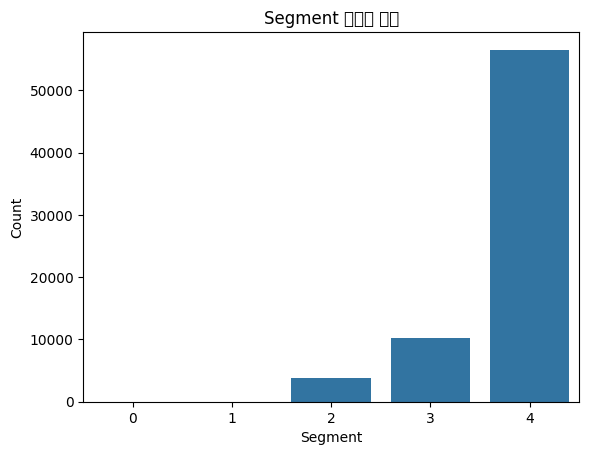

In [ ]:
sns.countplot(x=y)
plt.title("Segment 클래스 분포")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

In [ ]:
print(y.value_counts())

4    56505
3    10270
2     3753
0       28
1        4
Name: count, dtype: int64


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70560 entries, 0 to 70559
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   남녀구분코드            70560 non-null  int64  
 1   연령                70560 non-null  int64  
 2   Life_Stage        70560 non-null  int64  
 3   회원여부_연체           70560 non-null  int64  
 4   이용금액_할부_R12M      70560 non-null  int64  
 5   입회경과개월수_신용        70560 non-null  int64  
 6   월상환론한도금액          70560 non-null  int64  
 7   카드이용한도금액          70560 non-null  int64  
 8   증감율_이용금액_체크_전월    70560 non-null  float64
 9   이용금액_일시불_R12M     70560 non-null  int64  
 10  포인트_이용포인트_R12M    70560 non-null  int64  
 11  이용건수_체크_R12M      70560 non-null  int64  
 12  이용건수_신용_R12M      70560 non-null  int64  
 13  유효카드수_신용체크        70560 non-null  int64  
 14  이용금액_체크_R12M      70560 non-null  int64  
 15  불만제기후경과월_R12M     70560 non-null  int64  
 16  RP후경과월            70560 non-null  int64 

In [ ]:
## SMOTE + RandomOverSampler 조합

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import pandas as pd

# 1. SMOTE로 클래스 2, 3 보완
smote = SMOTE(
    sampling_strategy={2: 40000, 3: 45000},  # 원하는 수치로 증강
    random_state=42
)
X_sm, y_sm = smote.fit_resample(X, y)

# 2. RandomOverSampler로 클래스 0, 1 복제
ros = RandomOverSampler(
    sampling_strategy={0: 35000, 1: 30000},  # 최소 1,000개로 맞춤
    random_state=42
)
X_resampled, y_resampled = ros.fit_resample(X_sm, y_sm)

# 확인
print("클래스 분포:")
print(pd.Series(y_resampled).value_counts())


클래스 분포:
4    56505
3    45000
2    40000
0    35000
1    30000
Name: count, dtype: int64


<ipython-input-86-66b2b0831aa0>:5: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-86-66b2b0831aa0>:5: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-86-66b2b0831aa0>:5: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-86-66b2b0831aa0>:5: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-86-66b2b0831aa0>:5: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-86-66b2b0831aa0>:5: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-86-66b2b0831aa0>:5: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/p

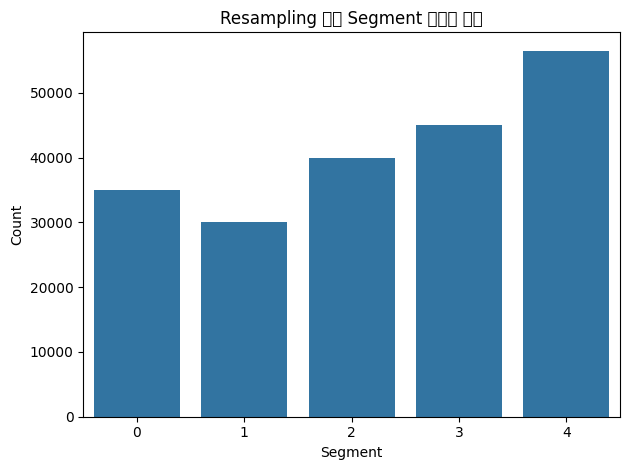

In [ ]:
sns.countplot(x=y_resampled)
plt.title("Resampling 이후 Segment 클래스 분포")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
X.shape

(70560, 54)

In [ ]:
y.shape

(70560,)

In [ ]:
missing_columns = X.columns[X.isnull().any()].tolist()
print("결측치가 있는 컬럼 수:", len(missing_columns))
print("결측치 포함 컬럼 목록:")
print(missing_columns)


결측치가 있는 컬럼 수: 0
결측치 포함 컬럼 목록:
[]


In [ ]:
### 하이퍼 파라미터 튜닝 및 앙상블

In [ ]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import make_scorer, f1_score, classification_report
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# import numpy as np

# # 1. 데이터 분할
# X_train, X_val, y_train, y_val = train_test_split(
#     X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
# )

# # 2. F1 scorer 정의
# f1_macro = make_scorer(f1_score, average='macro')

# # 3. XGBoost 튜닝
# param_xgb = {
#     'n_estimators': [100, 300],
#     'max_depth': [3, 5],
#     'learning_rate': [0.05, 0.1]
# }
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# grid_xgb = GridSearchCV(xgb, param_xgb, scoring=f1_macro, cv=3, n_jobs=-1)
# grid_xgb.fit(X_train, y_train)
# best_xgb = grid_xgb.best_estimator_

# # 4. LightGBM 튜닝
# param_lgb = {
#     'n_estimators': [100, 300],
#     'max_depth': [3, 5],
#     'learning_rate': [0.05, 0.1]
# }
# lgb = LGBMClassifier(random_state=42)
# grid_lgb = GridSearchCV(lgb, param_lgb, scoring=f1_macro, cv=3, n_jobs=-1)
# grid_lgb.fit(X_train, y_train)
# best_lgb = grid_lgb.best_estimator_

# # 5. CatBoost 기본 (튜닝은 선택)
# cat = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
# cat.fit(X_train, y_train)

# # 6. soft voting 예측
# xgb_proba = best_xgb.predict_proba(X_val)
# lgb_proba = best_lgb.predict_proba(X_val)
# cat_proba = cat.predict_proba(X_val)

# ensemble_proba = (xgb_proba + lgb_proba + cat_proba) / 3
# ensemble_pred = np.argmax(ensemble_proba, axis=1)  # 가장 큰 값 반환

# # 7. 평가
# print("F1 Score (macro):", f1_score(y_val, ensemble_pred, average='macro'))
# print("F1 Score (weighted):", f1_score(y_val, ensemble_pred, average='weighted'))
# print("\n Classification Report:")
# print(classification_report(y_val, ensemble_pred))


In [ ]:
#최적의 파라미터 적용한 코드!!!!!!!!!!!!!!!

# 하이퍼 파라미터 튜닝 및 앙상블

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np

# 1. 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# 2. F1 scorer 정의
f1_macro = make_scorer(f1_score, average='macro')

# 3. XGBoost 튜닝
xgb = XGBClassifier(n_estimators=300,
                    max_depth=5,
                    use_label_encoder=False,
                    eval_metric='mlogloss',
                    learning_rate=0.1,
                    random_state=42
)

xgb.fit(X_train, y_train)

# 4. LightGBM 튜닝
lgb = LGBMClassifier(n_estimators=300,
                     max_depth=5,
                     learning_rate=0.1,
                     random_state=42
)

lgb.fit(X_train, y_train)

# 5. CatBoost 기본 (튜닝은 선택)
cat = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
cat.fit(X_train, y_train)

# 6. soft voting 예측
xgb_proba = xgb.predict_proba(X_val)
lgb_proba = lgb.predict_proba(X_val)
cat_proba = cat.predict_proba(X_val)

ensemble_proba = (xgb_proba + lgb_proba + cat_proba) / 3
ensemble_pred = np.argmax(ensemble_proba, axis=1)  # 가장 큰 값 반환

# 7. 평가
print("F1 Score (macro):", f1_score(y_val, ensemble_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_val, ensemble_pred, average='weighted'))
print("\n Classification Report:")
print(classification_report(y_val, ensemble_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:15:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9517
[LightGBM] [Info] Number of data points in the train set: 165204, number of used features: 54
[LightGBM] [Info] Start training from score -1.774977
[LightGBM] [Info] Start training from score -1.929127
[LightGBM] [Info] Start training from score -1.641445
[LightGBM] [Info] Start training from score -1.523662
[LightGBM] [Info] Start training from score -1.295995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [ ]:
##예측

In [ ]:
x_new = pd.read_csv(test_path)
x_new[recommended_columns]

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,연체일수_최근,최종이용일자_기본,컨택건수_이용유도_TM_R6M,증감율_이용건수_체크_전월,마케팅동의여부,연체원금_최근,이용금액_체크_B0M,최종카드발급경과월,수신거부여부_SMS,RP건수_렌탈_B0M
0,1,40대,자녀성장(1),0,0,32,0,19445,0.000000,111616,...,-999999,20180714,1,0.000000,1,0,0,47,0,0
1,1,70대이상,노년생활,0,0,250,55729,210918,0.000000,39818,...,-999999,20181209,0,0.000000,1,0,0,30,1,0
2,1,50대,자녀성장(2),0,25004,28,0,49267,0.000000,74963,...,-999999,20180927,0,0.000000,1,0,0,6,0,0
3,1,20대,가족구축기,0,0,18,152414,43873,0.000000,14642,...,-999999,20180719,3,0.000000,1,0,0,9,0,0
4,1,60대,노년생활,0,6286,4,0,49656,0.000000,42074,...,-999999,20180719,0,0.000000,1,0,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1,30대,가족구축기,0,0,87,0,0,0.000000,0,...,0,20161204,4,0.000000,1,0,0,0,0,0
1436,1,30대,가족구축기,0,0,37,0,20329,-0.206064,6183,...,-999999,20181018,0,-0.194718,1,0,12921,35,0,0
1437,2,40대,자녀성장(1),0,2291,67,0,48738,0.000000,64721,...,-999999,20181122,0,0.000000,1,0,0,8,0,0
1438,2,40대,자녀성장(1),0,0,112,157114,30000,0.000000,738,...,-999999,20180803,2,0.000000,1,0,0,49,1,0


In [ ]:
x_new = preprocessing(x_new)
x_new[recommended_columns]

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,연체일수_최근,최종이용일자_기본,컨택건수_이용유도_TM_R6M,증감율_이용건수_체크_전월,마케팅동의여부,연체원금_최근,이용금액_체크_B0M,최종카드발급경과월,수신거부여부_SMS,RP건수_렌탈_B0M
0,1,2,4,0,0,32,0,19445,0.000000,111616,...,-999999,20180714,1,0.000000,1,0,0,47,0,0
1,1,5,1,0,0,250,55729,210918,0.000000,39818,...,-999999,20181209,0,0.000000,1,0,0,30,1,0
2,1,3,5,0,25004,28,0,49267,0.000000,74963,...,-999999,20180927,0,0.000000,1,0,0,6,0,0
3,1,0,0,0,0,18,152414,43873,0.000000,14642,...,-999999,20180719,3,0.000000,1,0,0,9,0,0
4,1,4,1,0,6286,4,0,49656,0.000000,42074,...,-999999,20180719,0,0.000000,1,0,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1,1,0,0,0,87,0,0,0.000000,0,...,0,20161204,4,0.000000,1,0,0,0,0,0
1436,1,1,0,0,0,37,0,20329,-0.206064,6183,...,-999999,20181018,0,-0.194718,1,0,12921,35,0,0
1437,2,2,4,0,2291,67,0,48738,0.000000,64721,...,-999999,20181122,0,0.000000,1,0,0,8,0,0
1438,2,2,4,0,0,112,157114,30000,0.000000,738,...,-999999,20180803,2,0.000000,1,0,0,49,1,0


In [ ]:
x_new = x_new[recommended_columns]
x_new

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,연체일수_최근,최종이용일자_기본,컨택건수_이용유도_TM_R6M,증감율_이용건수_체크_전월,마케팅동의여부,연체원금_최근,이용금액_체크_B0M,최종카드발급경과월,수신거부여부_SMS,RP건수_렌탈_B0M
0,1,2,4,0,0,32,0,19445,0.000000,111616,...,-999999,20180714,1,0.000000,1,0,0,47,0,0
1,1,5,1,0,0,250,55729,210918,0.000000,39818,...,-999999,20181209,0,0.000000,1,0,0,30,1,0
2,1,3,5,0,25004,28,0,49267,0.000000,74963,...,-999999,20180927,0,0.000000,1,0,0,6,0,0
3,1,0,0,0,0,18,152414,43873,0.000000,14642,...,-999999,20180719,3,0.000000,1,0,0,9,0,0
4,1,4,1,0,6286,4,0,49656,0.000000,42074,...,-999999,20180719,0,0.000000,1,0,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1,1,0,0,0,87,0,0,0.000000,0,...,0,20161204,4,0.000000,1,0,0,0,0,0
1436,1,1,0,0,0,37,0,20329,-0.206064,6183,...,-999999,20181018,0,-0.194718,1,0,12921,35,0,0
1437,2,2,4,0,2291,67,0,48738,0.000000,64721,...,-999999,20181122,0,0.000000,1,0,0,8,0,0
1438,2,2,4,0,0,112,157114,30000,0.000000,738,...,-999999,20180803,2,0.000000,1,0,0,49,1,0


In [ ]:
freq_map = x_new["연령"].value_counts().to_dict()
x_new["연령"] = x_new["연령"].map(freq_map)


freq_cols = [
    "Life_Stage",
    "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종",
    "_2순위업종", "_2순위교통업종", "_2순위쇼핑업종"
]

# 각 컬럼에 대해 Frequency Encoding 적용
for col in freq_cols:
    freq_map = x_new[col].value_counts().to_dict()
    x_new[col] = x_new[col].map(freq_map)

display(x_new)
display(x_new[[
    "Life_Stage",
    "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종",
    "_2순위업종", "_2순위교통업종", "_2순위쇼핑업종"
]])

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,연체일수_최근,최종이용일자_기본,컨택건수_이용유도_TM_R6M,증감율_이용건수_체크_전월,마케팅동의여부,연체원금_최근,이용금액_체크_B0M,최종카드발급경과월,수신거부여부_SMS,RP건수_렌탈_B0M
0,1,444,475,0,0,32,0,19445,0.000000,111616,...,-999999,20180714,1,0.000000,1,0,0,47,0,0
1,1,47,139,0,0,250,55729,210918,0.000000,39818,...,-999999,20181209,0,0.000000,1,0,0,30,1,0
2,1,335,362,0,25004,28,0,49267,0.000000,74963,...,-999999,20180927,0,0.000000,1,0,0,6,0,0
3,1,113,143,0,0,18,152414,43873,0.000000,14642,...,-999999,20180719,3,0.000000,1,0,0,9,0,0
4,1,160,139,0,6286,4,0,49656,0.000000,42074,...,-999999,20180719,0,0.000000,1,0,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1,341,143,0,0,87,0,0,0.000000,0,...,0,20161204,4,0.000000,1,0,0,0,0,0
1436,1,341,143,0,0,37,0,20329,-0.206064,6183,...,-999999,20181018,0,-0.194718,1,0,12921,35,0,0
1437,2,444,475,0,2291,67,0,48738,0.000000,64721,...,-999999,20181122,0,0.000000,1,0,0,8,0,0
1438,2,444,475,0,0,112,157114,30000,0.000000,738,...,-999999,20180803,2,0.000000,1,0,0,49,1,0


,Life_Stage,_1순위업종,_1순위쇼핑업종,_1순위교통업종,_2순위업종,_2순위교통업종,_2순위쇼핑업종
0,475,604,58,424,293,153,229
1,139,13,582,71,148,1012,705
2,362,604,393,424,166,153,160
3,143,114,393,424,166,153,71
4,139,13,58,424,148,153,705
...,...,...,...,...,...,...,...
1435,143,346,582,713,579,1012,705
1436,143,346,582,713,579,1012,705
1437,475,604,393,154,166,1012,192
1438,475,346,582,713,579,1012,705


In [ ]:
def predict_test(X_test):
    xgb_p = xgb.predict_proba(X_test)
    lgb_p = lgb.predict_proba(X_test)
    cat_p = cat.predict_proba(X_test)
    final_p = (xgb_p + lgb_p + cat_p) / 3
    return np.argmax(final_p, axis=1)

In [ ]:
predict_test(x_new)

array([3, 4, 3, ..., 4, 4, 3])

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/card_test_submission.csv")
submission

,ID,Segment
0,TRAIN_291453,D
1,TRAIN_104115,E
2,TRAIN_129210,D
3,TRAIN_194246,E
4,TRAIN_183742,E
...,...,...
1435,TRAIN_141071,E
1436,TRAIN_202449,D
1437,TRAIN_304936,E
1438,TRAIN_208688,E


In [ ]:
#submission = submission.drop(columns=["Unnamed: 0"])
submission

,ID,Segment
0,TRAIN_291453,D
1,TRAIN_104115,E
2,TRAIN_129210,D
3,TRAIN_194246,E
4,TRAIN_183742,E
...,...,...
1435,TRAIN_141071,E
1436,TRAIN_202449,D
1437,TRAIN_304936,E
1438,TRAIN_208688,E


In [ ]:
submission['Segment'] = pd.Series(predict_test(x_new)).replace({0:'A', 1:'B', 2:'C', 3:'D', 4:'E'})
submission

,ID,Segment
0,TRAIN_291453,D
1,TRAIN_104115,E
2,TRAIN_129210,D
3,TRAIN_194246,E
4,TRAIN_183742,E
...,...,...
1435,TRAIN_141071,E
1436,TRAIN_202449,E
1437,TRAIN_304936,E
1438,TRAIN_208688,E


In [ ]:
submission.to_csv("/content/drive/MyDrive/card_test_submission.csv", index=False)

In [ ]:
## KFold검증

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer
from xgboost import XGBClassifier
import numpy as np

In [ ]:
f1_macro = make_scorer(f1_score, average='macro')

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
model_xgb = xgb
model_lgb = lgb
model_cat = cat

In [ ]:
scores_xgb = cross_val_score(
    model_xgb,
    X_resampled, y_resampled,
    scoring=f1_macro,
    cv=cv,
    n_jobs=-1,  # 병렬 처리
    verbose=1
)

scores_lgb = cross_val_score(
    model_lgb,
    X_resampled, y_resampled,
    scoring=f1_macro,
    cv=cv,
    n_jobs=-1,  # 병렬 처리
    verbose=1
)

scores_cat = cross_val_score(
    model_cat,
    X_resampled, y_resampled,
    scoring=f1_macro,
    cv=cv,
    n_jobs=-1,  # 병렬 처리
    verbose=1
)

print("------------XGB----------------")
print("Fold별 F1 (macro):", scores_xgb)
print("평균 F1 (macro):", np.mean(scores_xgb))
print("------------LGB----------------")
print("Fold별 F1 (macro):", scores_lgb)
print("평균 F1 (macro):", np.mean(scores_lgb))
print("------------CAT----------------")
print("Fold별 F1 (macro):", scores_cat)
print("평균 F1 (macro):", np.mean(scores_cat))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


------------XGB----------------
Fold별 F1 (macro): [0.93398381 0.93492572 0.93354183]
평균 F1 (macro): 0.93415045674961
------------LGB----------------
Fold별 F1 (macro): [0.94271016 0.94444878 0.94311016]
평균 F1 (macro): 0.9434230327892381
------------CAT----------------
Fold별 F1 (macro): [0.91899818 0.91809517 0.91596531]
평균 F1 (macro): 0.917686221269042


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.5min finished
